# Importing the libraries

In [53]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split , cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder , OneHotEncoder
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,recall_score,f1_score,precision_score,classification_report
from sklearn.tree import DecisionTreeClassifier

#Impoting the dataset

In [99]:
df = pd.read_csv('/content/healthcare_dataset.csv')

In [55]:
df.head(3)

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Bobby JacksOn,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,Normal
1,LesLie TErRy,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,265,Emergency,2019-08-26,Ibuprofen,Inconclusive
2,DaNnY sMitH,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,205,Emergency,2022-10-07,Aspirin,Normal


In [56]:
df.shape

(55500, 15)

In [57]:
df.describe()

,Age,Billing Amount,Room Number
count,55500.000000,55500.000000,55500.000000
mean,51.539459,25539.316097,301.134829
std,19.602454,14211.454431,115.243069
min,13.000000,-2008.492140,101.000000
25%,35.000000,13241.224652,202.000000
50%,52.000000,25538.069376,302.000000
75%,68.000000,37820.508436,401.000000
max,89.000000,52764.276736,500.000000


In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55500 entries, 0 to 55499
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                55500 non-null  object 
 1   Age                 55500 non-null  int64  
 2   Gender              55500 non-null  object 
 3   Blood Type          55500 non-null  object 
 4   Medical Condition   55500 non-null  object 
 5   Date of Admission   55500 non-null  object 
 6   Doctor              55500 non-null  object 
 7   Hospital            55500 non-null  object 
 8   Insurance Provider  55500 non-null  object 
 9   Billing Amount      55500 non-null  float64
 10  Room Number         55500 non-null  int64  
 11  Admission Type      55500 non-null  object 
 12  Discharge Date      55500 non-null  object 
 13  Medication          55500 non-null  object 
 14  Test Results        55500 non-null  object 
dtypes: float64(1), int64(2), object(12)
memory usage: 6.4

In [59]:
df.isnull().sum()

Name                  0
Age                   0
Gender                0
Blood Type            0
Medical Condition     0
Date of Admission     0
Doctor                0
Hospital              0
Insurance Provider    0
Billing Amount        0
Room Number           0
Admission Type        0
Discharge Date        0
Medication            0
Test Results          0
dtype: int64

In [60]:
df.dtypes

Name                   object
Age                     int64
Gender                 object
Blood Type             object
Medical Condition      object
Date of Admission      object
Doctor                 object
Hospital               object
Insurance Provider     object
Billing Amount        float64
Room Number             int64
Admission Type         object
Discharge Date         object
Medication             object
Test Results           object
dtype: object

In [61]:
#finding the unique count of the all columns
unique_count = {}
for column in df.columns:
  unique_count[column] = df[column].nunique()
print('unique count of each feature:')
for column , count in unique_count.items():
   print(f"{column}: {count}")

unique count of each feature:
Name: 49992
Age: 77
Gender: 2
Blood Type: 8
Medical Condition: 6
Date of Admission: 1827
Doctor: 40341
Hospital: 39876
Insurance Provider: 5
Billing Amount: 50000
Room Number: 400
Admission Type: 3
Discharge Date: 1856
Medication: 5
Test Results: 3


# Visualization

In [62]:
#piechart for the bloodtype and their count
plt.figure(figsize=(4,4))
fd = df['Blood Type'].value_counts()
dd =fd.values
cd =fd.index
dc = px.pie(fd,values=dd,names=cd,hole=0.4)
dc.update_layout(width=600,height=400)
dc.show()

<Figure size 400x400 with 0 Axes>

<ipython-input-27-1722d5402405>:9: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


<ipython-input-27-1722d5402405>:9: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


<ipython-input-27-1722d5402405>:9: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use ei

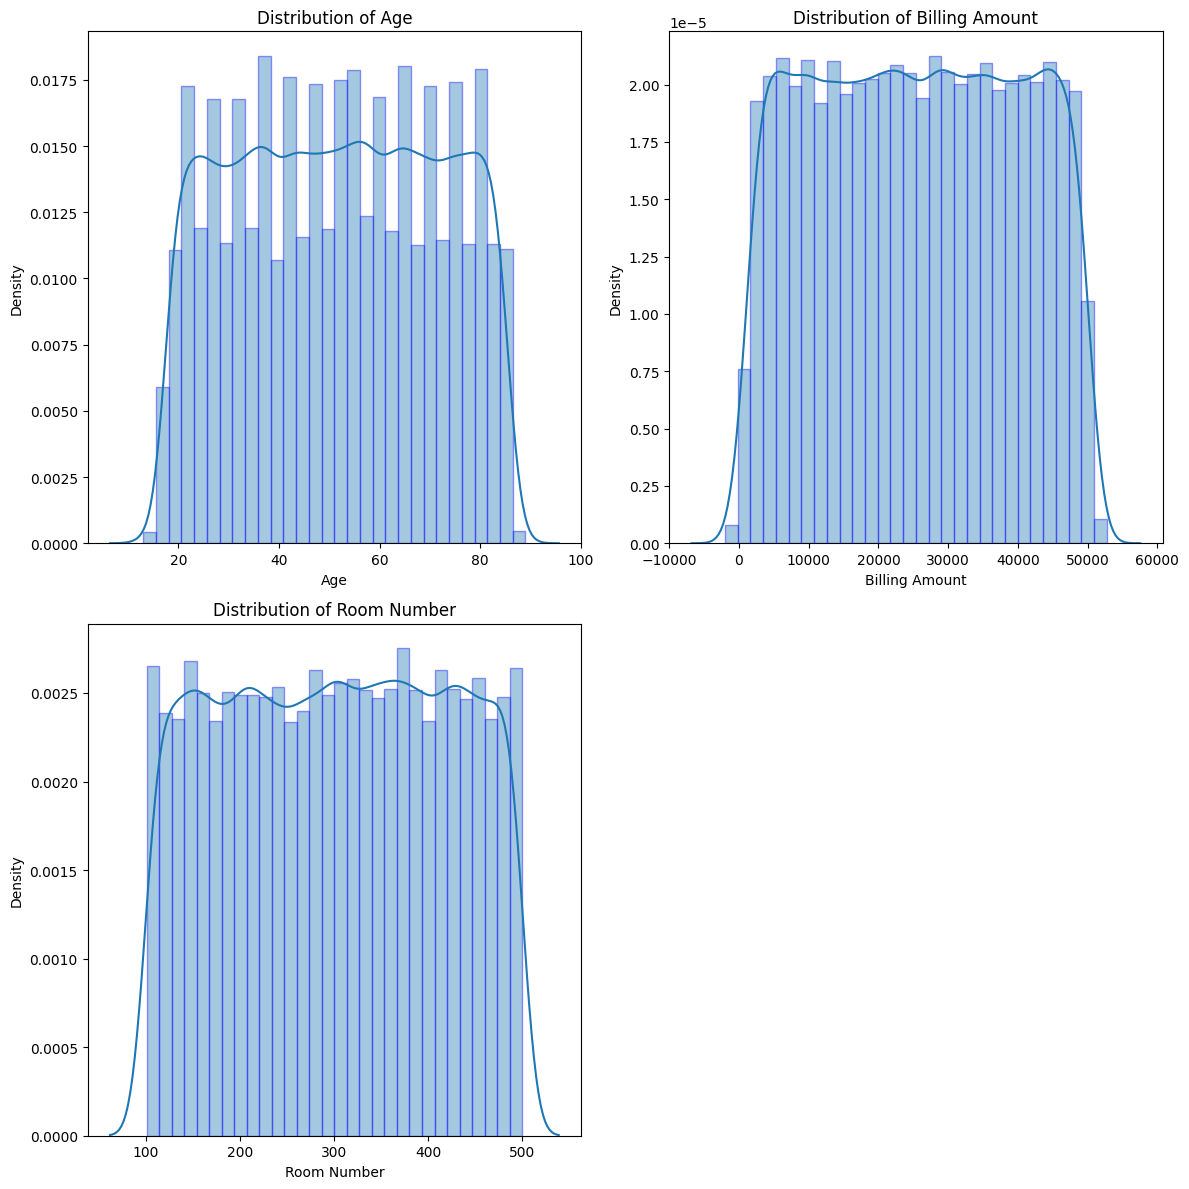

In [27]:
#distplots for the dtypes of int and float
numeric_columns = df.select_dtypes(include=['int64','float64']).columns
num_plots = len(numeric_columns)
num_cols = 2
num_rows = -(-num_plots // num_cols)
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 6*num_rows))
axes = axes.flatten()
for i, column in enumerate(numeric_columns):
    sns.distplot(df[column], bins=30, kde=True, hist_kws={'edgecolor': 'blue'}, ax=axes[i])
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Density')
    axes[i].set_title(f'Distribution of {column}')
for j in range(i+1, num_rows*num_cols):
    fig.delaxes(axes[j])
plt.tight_layout()
plt.show()

In [63]:
#based on the test results age count
df[['Test Results','Age']].value_counts()

Test Results  Age
Normal        37     318
              34     312
Abnormal      53     307
Inconclusive  38     306
Abnormal      52     305
                    ... 
              89       4
Normal        13       3
Inconclusive  13       3
              89       2
Normal        89       2
Name: count, Length: 231, dtype: int64

In [64]:
# Top 10 patient names based on their Billing Amount
df.groupby(['Name'])['Billing Amount'].count().sort_values(ascending=False).head(10)

Name
DAvId muNoZ             3
allIsON cOok            2
davId ADams             2
mr. bRyCe gutierReZ     2
ERiC NEWtOn             2
ERiC DixOn              2
RicHArd DIaz            2
davId coRDova           2
mr. david FREy          2
mr. fRANKLIN cOllInS    2
Name: Billing Amount, dtype: int64

(0.0, 5.0)

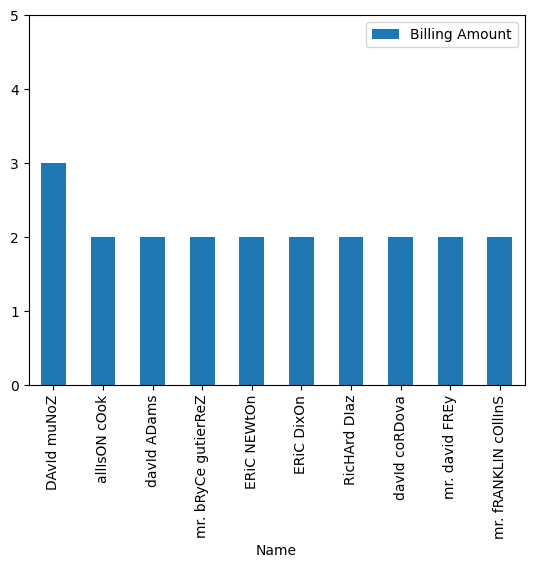

In [65]:
df.groupby(['Name'])['Billing Amount'].count().sort_values(ascending=False).head(10).plot.bar()
plt.legend()
plt.ylim(0,5)

In [66]:
#checking for the above graph
occurrences = df['Name'].value_counts().get('DAvId muNoZ', 0)
print("Occurrences of 'DAvId muNoZ':",occurrences)

Occurrences of 'DAvId muNoZ': 3


([0, 1, 2, 3, 4],
 [Text(0, 0, 'Blue Cross'),
  Text(1, 0, 'Medicare'),
  Text(2, 0, 'Aetna'),
  Text(3, 0, 'UnitedHealthcare'),
  Text(4, 0, 'Cigna')])

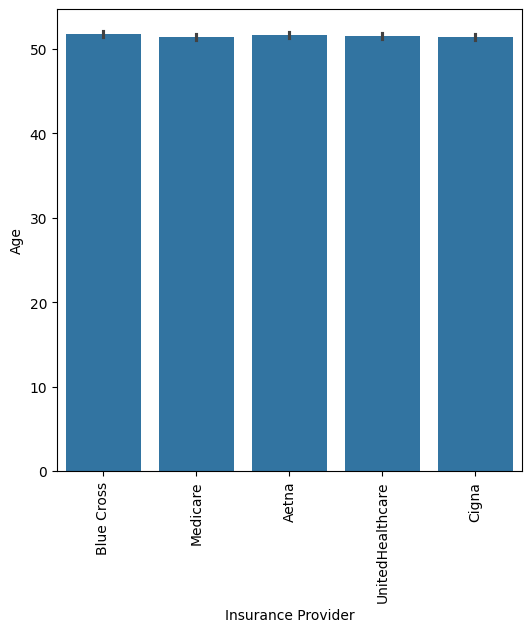

In [67]:
#barchart between the Insurance provider and the age of the patient
plt.figure(figsize=(6,6))
sns.barplot(x=df['Insurance Provider'],y=df['Age'],data=df)
plt.xticks(rotation=90)

<Axes: xlabel='Blood Type', ylabel='count'>

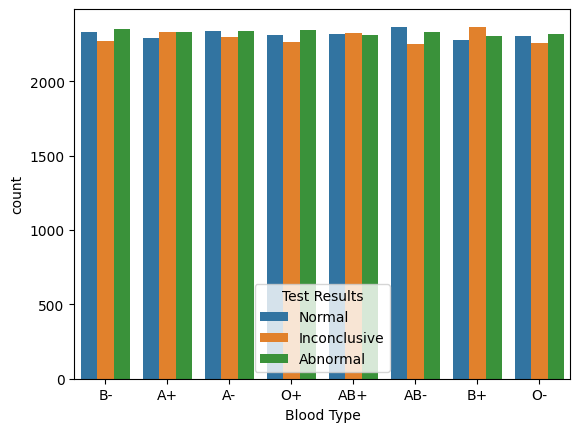

In [68]:
#countplot between the BloodType and the Test Results
sns.countplot(x='Blood Type',data=df , hue='Test Results')

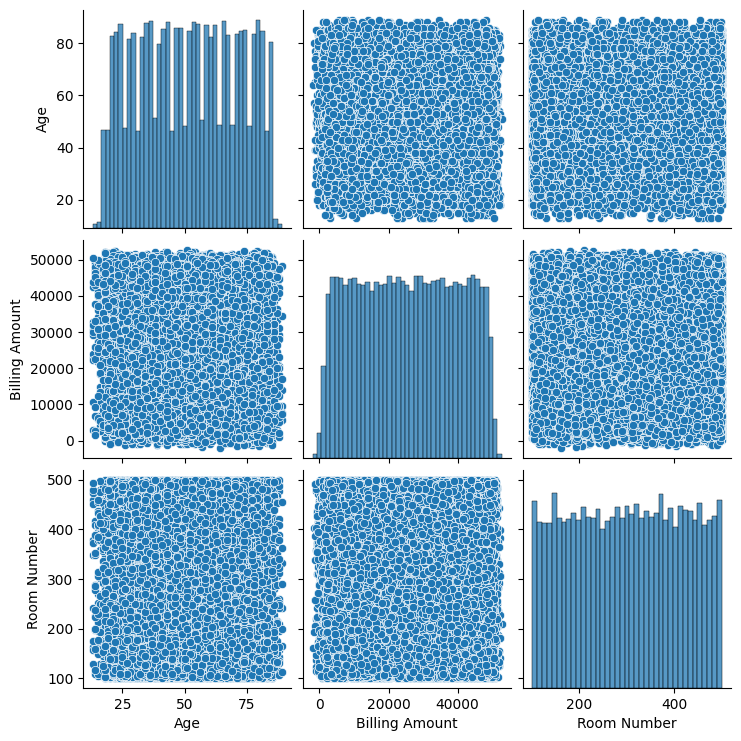

In [69]:
sns.pairplot(df)

In [70]:
columns = ['Age' , 'Billing Amount' , 'Room Number']
correlation = df[columns].corr()
print(correlation)

                     Age  Billing Amount  Room Number
Age             1.000000       -0.003832    -0.000720
Billing Amount -0.003832        1.000000    -0.002943
Room Number    -0.000720       -0.002943     1.000000


<Axes: >

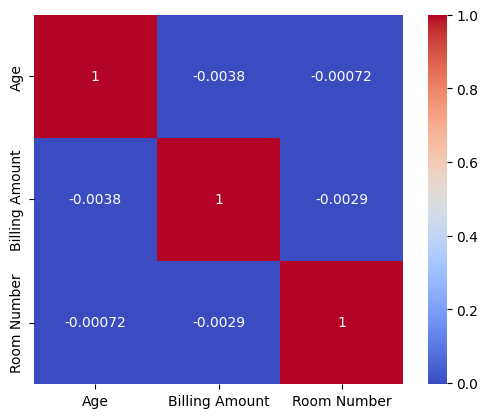

In [71]:
sns.heatmap(correlation,square=True,cbar=True,annot=True,cmap='coolwarm')

array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Billing Amount'}>],
       [<Axes: title={'center': 'Room Number'}>, <Axes: >]], dtype=object)

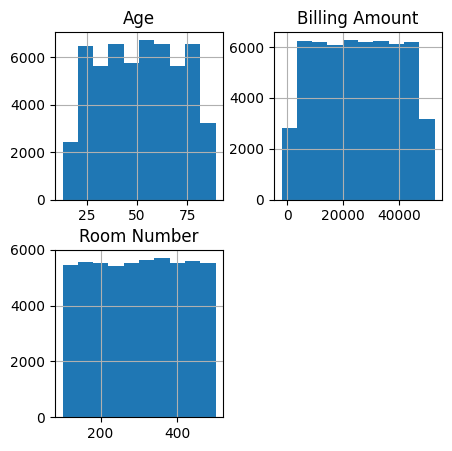

In [72]:
df.hist(figsize=(5,5),bins=10)

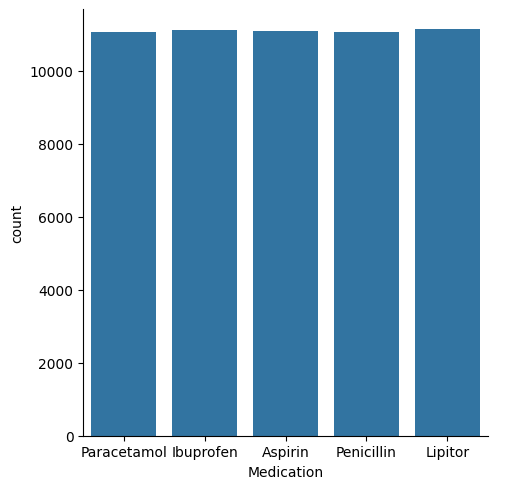

In [73]:
sns.catplot(data=df,x='Medication',kind='count')

In [ ]:
for feature in df.columns:
  data = df.copy()
  data.groupby(feature)['Age'].median().plot.bar()
  plt.xlabel(feature)
  plt.ylabel('Age')
  plt.title(feature)
  plt.show()

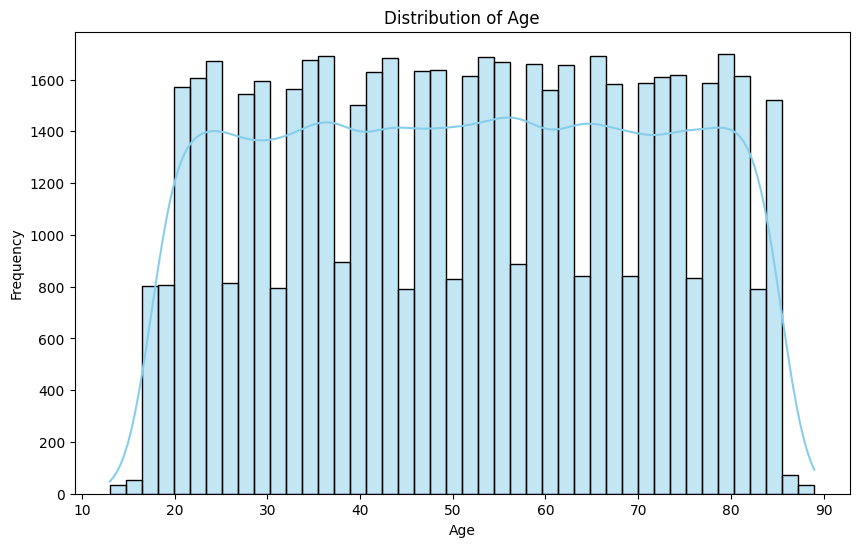

In [74]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], kde=True, color='skyblue')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

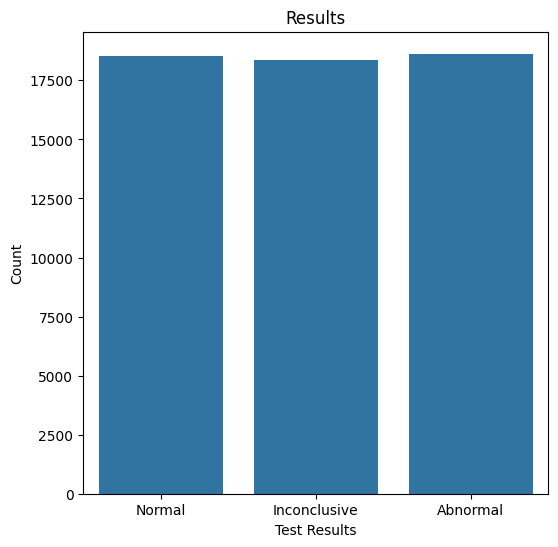

In [24]:
plt.figure(figsize=(6, 6))
sns.countplot(df, x="Test Results")
plt.title('Results')
plt.xlabel('Test Results')
plt.ylabel('Count')
plt.show()

# Data Preprocessing

In [101]:
df = df.drop(columns = ['Date of Admission', 'Name', 'Doctor','Room Number', 'Hospital', 'Discharge Date'])

In [102]:
df

,Age,Gender,Blood Type,Medical Condition,Insurance Provider,Billing Amount,Admission Type,Medication,Test Results
0,30,Male,B-,Cancer,Blue Cross,18856.281306,Urgent,Paracetamol,Normal
1,62,Male,A+,Obesity,Medicare,33643.327287,Emergency,Ibuprofen,Inconclusive
2,76,Female,A-,Obesity,Aetna,27955.096079,Emergency,Aspirin,Normal
3,28,Female,O+,Diabetes,Medicare,37909.782410,Elective,Ibuprofen,Abnormal
4,43,Female,AB+,Cancer,Aetna,14238.317814,Urgent,Penicillin,Abnormal
...,...,...,...,...,...,...,...,...,...
55495,42,Female,O+,Asthma,Blue Cross,2650.714952,Elective,Penicillin,Abnormal
55496,61,Female,AB-,Obesity,Cigna,31457.797307,Elective,Aspirin,Normal
55497,38,Female,B+,Hypertension,UnitedHealthcare,27620.764717,Urgent,Ibuprofen,Abnormal
55498,43,Male,O-,Arthritis,Medicare,32451.092358,Elective,Ibuprofen,Abnormal


In [103]:
sc = LabelEncoder()

In [104]:
df.dtypes

Age                     int64
Gender                 object
Blood Type             object
Medical Condition      object
Insurance Provider     object
Billing Amount        float64
Admission Type         object
Medication             object
Test Results           object
dtype: object

In [105]:
df['Gender'] = sc.fit_transform(df['Gender'])
df['Blood Type'] = sc.fit_transform(df['Blood Type'])
df['Medical Condition'] = sc.fit_transform(df['Medical Condition'])
df['Insurance Provider'] = sc.fit_transform(df['Insurance Provider'])
df['Admission Type'] = sc.fit_transform(df['Admission Type'])
df['Medication'] = sc.fit_transform(df['Medication'])

In [106]:
df.head(1)

,Age,Gender,Blood Type,Medical Condition,Insurance Provider,Billing Amount,Admission Type,Medication,Test Results
0,30,1,5,2,1,18856.281306,2,3,Normal


# Splitting of the data

In [107]:
X = df.drop(columns = 'Test Results')
Y = df['Test Results']

In [108]:
X_train , X_test , Y_train , Y_test = train_test_split(X,Y,test_size=0.3,random_state=42)

# model selection , cross validation & Hyper parameter tUNING

In [109]:
model = KNeighborsClassifier(n_neighbors=3)

In [116]:
cv_scores = cross_val_score(model, X_train, Y_train, cv=5, scoring='accuracy')
print(cv_scores)
print("Mean Accuracy:", cv_scores.mean())

[0.36589447 0.36589447 0.35096525 0.37310167 0.36254826]
Mean Accuracy: 0.36368082368082366


In [118]:
grid = {
    'n_neighbors': [3, 5, 7, 9, 11, 13, 15],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
}
clf = GridSearchCV(model, grid, cv=5, scoring='accuracy', return_train_score=False)
clf.fit(X_train, Y_train)
best_params = clf.best_params_
print("Best Hyperparameters:", best_params)
best_model = clf.best_estimator_
accuracy = best_model.score(X_test, Y_test)
print("Accuracy of the best model:", accuracy)

Best Hyperparameters: {'algorithm': 'auto', 'n_neighbors': 3, 'weights': 'distance'}
Accuracy of the best model: 0.4153153153153153


In [119]:
model.fit(X_train,Y_train)

KNeighborsClassifier(n_neighbors=3)

In [120]:
y_pred = model.predict(X_test)
print("Test Accuracy:",accuracy_score(Y_test,y_pred))

Test Accuracy: 0.37237237237237236


# Confusion Matrix

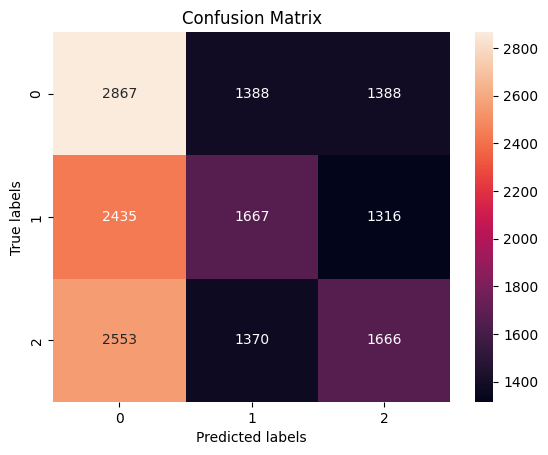

In [121]:
cm = confusion_matrix(Y_test,y_pred)
sns.heatmap(cm, annot=True, fmt='g')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [122]:
def evaluate_model(model,X_test,Y_test):
    y_pred = model.predict(X_test)
    print("Test Accuracy:",accuracy_score(Y_test,y_pred))
    print(classification_report(Y_test,y_pred))

evaluate_model(model,X_test,Y_test)

Test Accuracy: 0.37237237237237236
              precision    recall  f1-score   support

    Abnormal       0.36      0.51      0.42      5643
Inconclusive       0.38      0.31      0.34      5418
      Normal       0.38      0.30      0.33      5589

    accuracy                           0.37     16650
   macro avg       0.37      0.37      0.37     16650
weighted avg       0.37      0.37      0.37     16650



# Decision Tree Classifier

In [124]:
model1 = DecisionTreeClassifier()
model1.fit(X_train , Y_train)

DecisionTreeClassifier()

In [125]:
y_pred1 = model.predict(X_test)

In [126]:
print("Test Accuracy:", accuracy_score(Y_test, y_pred1))
print("Recall Score:", recall_score(Y_test, y_pred1, average='micro'))  # Change the average parameter here
print("F1 Score:", f1_score(Y_test, y_pred1, average='macro'))
print("Precision Score:", precision_score(Y_test, y_pred1, average='weighted'))

Test Accuracy: 0.37237237237237236
Recall Score: 0.37237237237237236
F1 Score: 0.3660310964457991
Precision Score: 0.3742614737411367


# Random Forest Classifier

In [127]:
#Random Forest Classifier
rf = RandomForestClassifier()
rf.fit(X_train,Y_train)

RandomForestClassifier()

In [128]:
y_pred2 = rf.predict(X_test)

In [129]:
print(accuracy_score(Y_test,y_pred2))
print(recall_score(Y_test,y_pred2,average='micro'))
print(f1_score(Y_test,y_pred2,average='macro'))
print(precision_score(Y_test,y_pred2,average='weighted'))

0.4201201201201201
0.4201201201201201
0.420057248526462
0.4202861822319159


In [130]:
final_data = pd.DataFrame({'Models':['LogisticRegression','DecisionTree','RandomForest'],
                           'Accuracy_score':[accuracy_score(Y_test,y_pred)*100,
                                             accuracy_score(Y_test,y_pred1)*100,
                                             accuracy_score(Y_test,y_pred2)*100]})

In [149]:
final_data

,Models,Accuracy_score
0,LogisticRegression,37.237237
1,DecisionTree,37.237237
2,RandomForest,42.012012


<Axes: xlabel='Models', ylabel='Accuracy_score'>

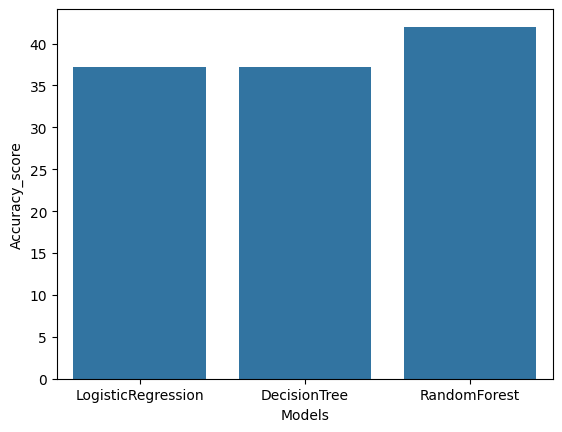

In [132]:
sns.barplot(x=final_data['Models'],y=final_data['Accuracy_score'])

In [133]:
df.columns

Index(['Age', 'Gender', 'Blood Type', 'Medical Condition',
       'Insurance Provider', 'Billing Amount', 'Admission Type', 'Medication',
       'Test Results'],
      dtype='object')

# validation & Testing

In [146]:
x = np.array(df[['Age','Gender','Blood Type','Medical Condition','Insurance Provider','Billing Amount','Admission Type','Medication']])

In [147]:
#case-1
features = [[30,1,5,2,1,18856.281306,2,3]]
model.predict(features)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but KNeighborsClassifier was fitted with feature names



array(['Normal'], dtype=object)

In [148]:
#case-2
features = [[62,1,0,5,3,33643.327287,1,1]]
model.predict(features)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but KNeighborsClassifier was fitted with feature names



array(['Inconclusive'], dtype=object)

In [ ]:
conclusion:
In the case-1 scenario the person does not suffering from any disease.
In the case-2 scenario the person is suffering from the disease the test result is inconclusive.

In [139]:
import pickle

In [140]:
filename = 'Disease model.sav'
pickle.dump(model,open(filename,'wb'))

In [143]:
loaded_model = pickle.load(open('Disease model.sav','rb'))